# pymunk 

In [26]:
import pygame
import pymunk
import pymunk.pygame_util
from pygame.locals import QUIT

# 初始化 pygame
pygame.init()
screen = pygame.display.set_mode((600, 1200))
clock = pygame.time.Clock()
running = True

# 初始化 pymunk
space = pymunk.Space()
space.gravity = (0, 900)  # 设置重力

# 创建地面
ground_body = pymunk.Body(body_type=pymunk.Body.STATIC)
ground_shape = pymunk.Segment(ground_body, (100, 1000), (500, 1000), 1)
ground_shape.friction = 0.5
space.add(ground_body, ground_shape)

# 创建球体
ball_body = pymunk.Body(100, pymunk.moment_for_circle(1, 0, 25))
ball_body.position = (300, 0)
ball_shape = pymunk.Circle(ball_body, 25)
ball_shape.elasticity = 0.8
space.add(ball_body, ball_shape)

# 创建方块
box_body = pymunk.Body(1, pymunk.moment_for_box(1, (50, 50)))
box_body.position = (300, 300)
box_shape = pymunk.Poly.create_box(box_body, (80, 80))
box_shape.elasticity = 0.8
space.add(box_body, box_shape)

# 设置绘图选项
draw_options = pymunk.pygame_util.DrawOptions(screen)

# 主循环
while running:
    for event in pygame.event.get():
        if event.type == QUIT:
            running = False

    # 更新物理模拟
    space.step(1/60.0)

    # 清屏
    screen.fill((255, 255, 255))

    # 绘制物理对象
    space.debug_draw(draw_options)

    # 刷新屏幕
    pygame.display.flip()
    clock.tick(60)

pygame.quit()

In [27]:

def pymunk_to_shapely(body, shapes):
    geoms = list()
    for shape in shapes:
        if isinstance(shape, pymunk.shapes.Poly):
            verts = [body.local_to_world(v) for v in shape.get_vertices()]
            verts += [verts[0]]
            geoms.append(sg.Polygon(verts))
        else:
            raise RuntimeError(f'Unsupported shape type {type(shape)}')
    geom = sg.MultiPolygon(geoms)
    return geom

In [28]:
import pymunk
import shapely.geometry as sg

# 创建一个pymunk物体和形状
body = pymunk.Body()
shape1 = pymunk.Poly(body, [(0, 0), (0, 1), (1, 1), (1, 0)])
shape2 = pymunk.Poly(body, [(1, 1), (1, 2), (2, 2), (2, 1)])

# 转换为shapely几何对象
shapely_geom = pymunk_to_shapely(body, [shape1, shape2])

# 打印转换后的几何对象
print(shapely_geom)

MULTIPOLYGON (((0 0, 1 0, 1 1, 0 1, 0 0)), ((1 1, 2 1, 2 2, 1 2, 1 1)))


In [32]:
# def _get_obs(self):
#     obs = np.array(
#         tuple(self.agent.position) \
#         + tuple(self.block.position) \
#         + (self.block.angle % (2 * np.pi),))
#     return obs
import numpy as np
np.array(tuple([1])+tuple([4])+(5,))

array([1, 4, 5])

# 高斯分布

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

/home/camille/miniconda3/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([100, 500])
torch.Size([10000])
tensor([-2.4143,  2.3465,  0.6145,  ...,  1.2194,  2.5262,  1.3295],
       device='cuda:0')
(10000,)


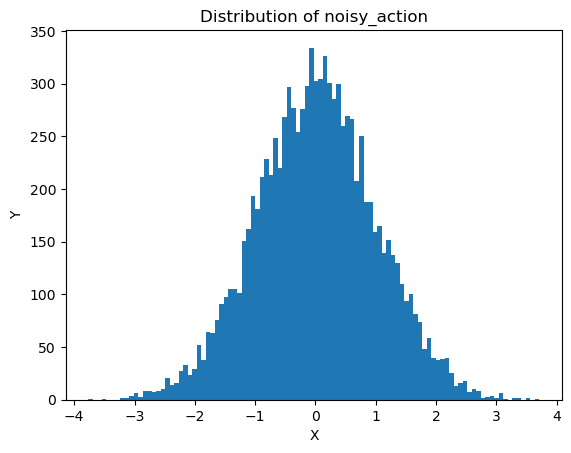

In [5]:
noisy_action = torch.randn((100, 500), device="cuda:0", dtype=torch.float32)
print(noisy_action.shape)

noisy_action_flatten = noisy_action.flatten()

# 随即从noisy_action中采样1000个样本
sampled_noisy_action = noisy_action_flatten[torch.randint(0, 50000, (10000,), device="cuda:0")]
print(sampled_noisy_action.shape)
print(sampled_noisy_action)

one_dim=sampled_noisy_action.cpu().numpy().flatten()
print(one_dim.shape)
# 绘制采样后的noisy_action分布
plt.hist(one_dim, bins=100)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribution of noisy_action')
plt.show()



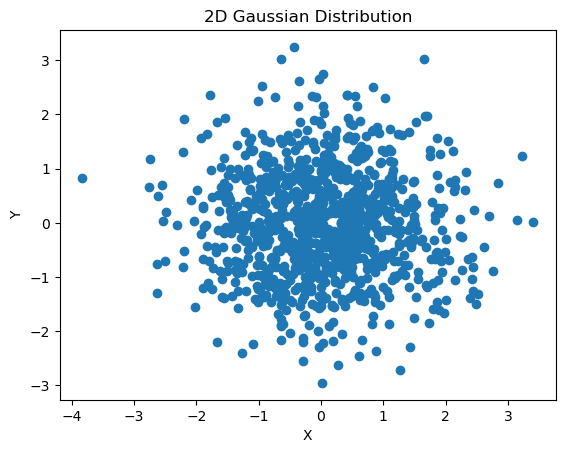

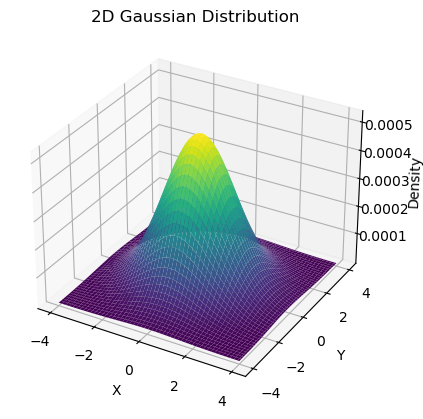

In [1]:

# Generate random data
mean = [0, 0]
cov = [[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
noisy_action = torch.randn(
                (2, 7), device="cuda:0", dtype=torch.float32)

# Plot the data
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distribution')

# Plot the density function
# plt.hist2d(x, y, bins=30, cmap='Blues')

plt.show()

# Generate grid points for the density function
x_grid, y_grid = npshgrid(np.npace(-4, 4, 100), np.linnp(-4, 4, 100))

# Calculate the density function values for each grid point
density = npros_like(x_grid)
for i in range(len(x)):
    density += npp(-0.5 * ((x_grid - x[i])**2 + (y_grid - y[i])**2))

# Normalize the density function
density /= npm(density)

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, density, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('2D Gaussian Distribution')

plt.show()